In [64]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from Bio import Entrez
from scipy.cluster.hierarchy import dendrogram, linkage
import subprocess
import multiprocessing
import plotly.express as px

In [215]:
dataset = 'test'
path = f'DATA/{dataset}/'

In [216]:
data = pd.read_table(f'DATA/{dataset}/result_coverage_table.tsv', index_col=0, converters={'fragments_coverage': pd.eval})

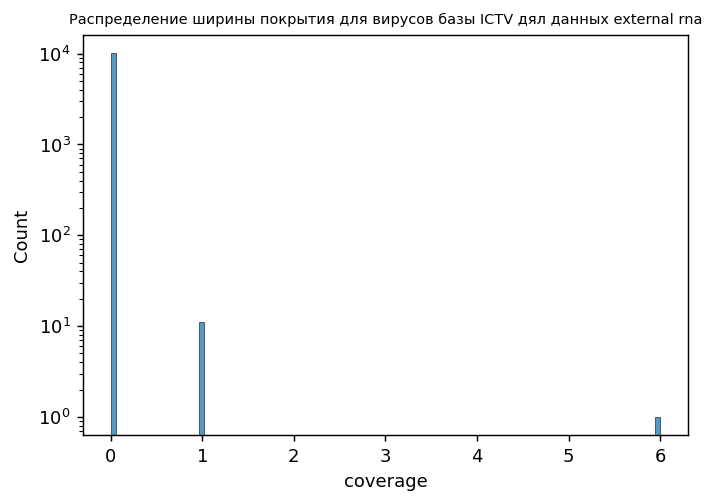

In [217]:
plt.figure(figsize=(6, 4), dpi=130)
plt.title('Распределение ширины покрытия для вирусов базы ICTV дял данных external rna', fontdict={'size':8})
sns.histplot(data.coverage, bins=100)
plt.yscale('log')

Text(0, 0.5, 'Virus names sorted by mean coverage')

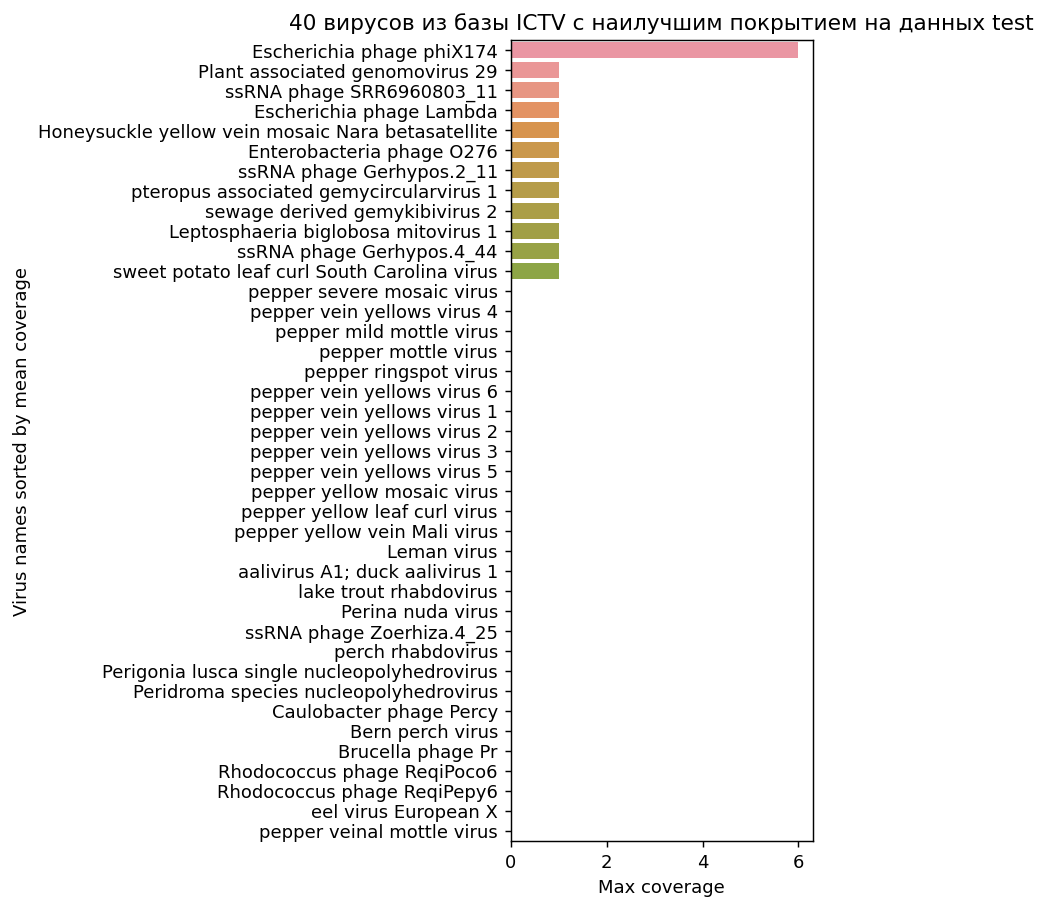

In [218]:
plt.figure(figsize=(3, 8), dpi=130)
plt.title(f'40 вирусов из базы ICTV с наилучшим покрытием на данных {dataset}')
sns.barplot(data=data[:40].sort_values('coverage', ascending=False), x='max_coverage', y='Virus name(s)')
plt.xlabel('Max coverage')
plt.ylabel('Virus names sorted by mean coverage')

In [219]:
ictv_coverages = glob.glob(f'{path}/ictv_coverage/*.csv')

In [220]:
common_table = (pd.DataFrame(pd.read_csv(ictv_coverages[0], index_col=0).coverage).
                rename(columns={'coverage':os.path.splitext(os.path.basename(ictv_coverages[0]))[0]}))
for ictv_coverage in ictv_coverages[1:]:
    name = os.path.splitext(os.path.basename(ictv_coverage))[0]
    common_table[name] = pd.DataFrame(pd.read_csv(ictv_coverage, index_col=0).coverage)

In [221]:
means = common_table.max(axis=1)
# sort the rows by the median values
sorted_df = common_table.iloc[means.argsort()[::-1]]

Text(92.13888888888886, 0.5, 'Species sorted by max coverage')

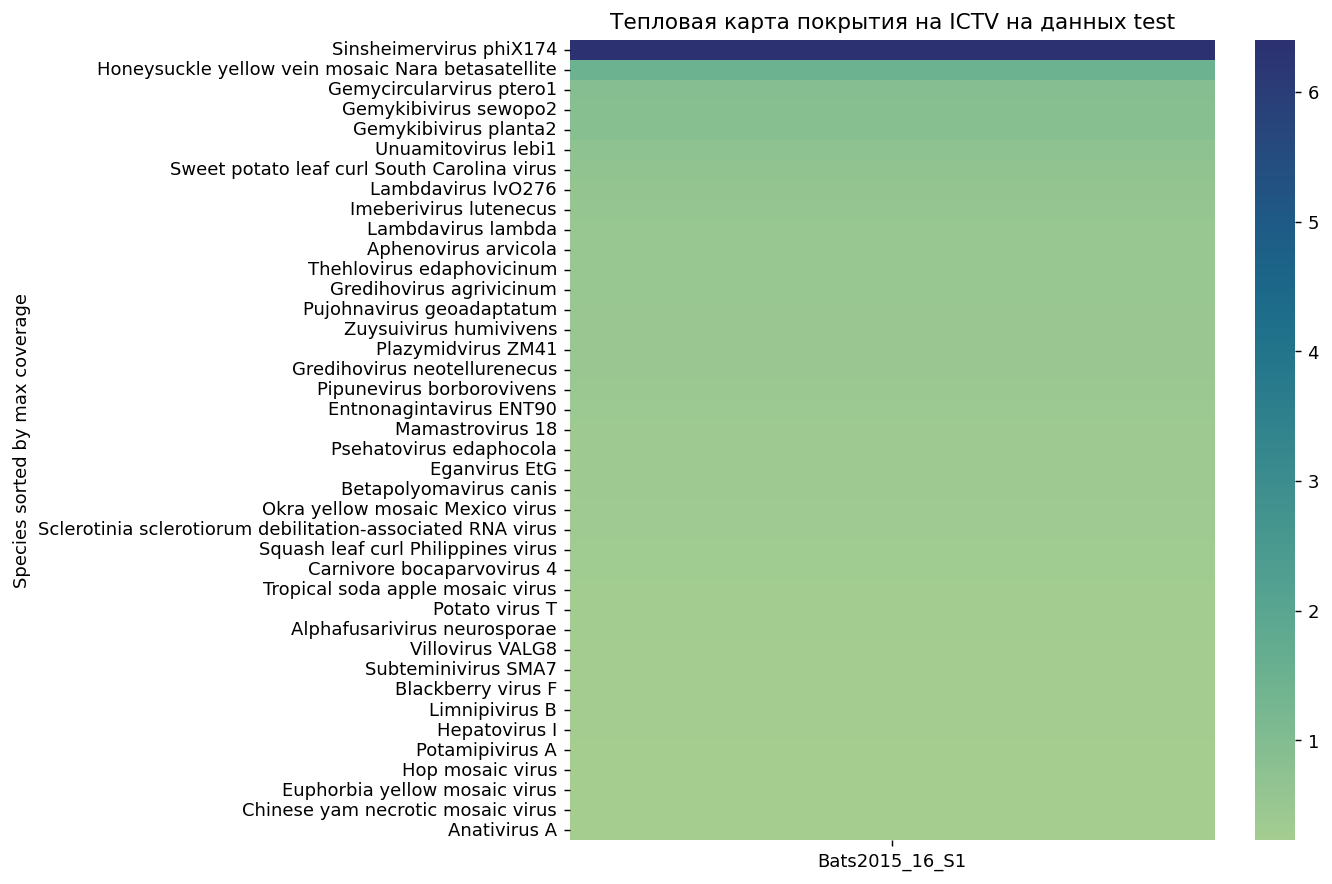

In [222]:
plt.figure(figsize=(8, 8), dpi=130)
sns.heatmap(sorted_df[:40]*100, cmap="crest")
plt.title(f'Тепловая карта покрытия на ICTV на данных {dataset}')
plt.ylabel('Species sorted by max coverage')